In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='whitegrid')
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('sample_of_lending_club_from_population.csv')
data = data.drop(['Unnamed: 0'],1)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,16600.0,16600.0,16600.00000,60 months,15.96,403.33,C,C5,Coventry Health Care,10+ years,RENT,40000.0,Not Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 11/23/11 > Debt consolidat...,debt_consolidation,PAYOFF,219xx,MD,13.17,0.0,Feb-01,3.0,NaN,NaN,13.0,0.0,15964.0,65.10%,24.0,f,0.0,0.0,20516.056550,20516.06,16600.0,3916.06,0.0,0.0,0.0,Aug-13,12863.34,NaN,Nov-13,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,14500.0,14500.0,14500.00000,60 months,10.00,308.09,B,B2,Wells -Fargo Bank,10+ years,MORTGAGE,77400.0,Not Verified,Jan-11,Fully Paid,n,NaN,NaN,debt_consolidation,YK Consolidation,562xx,MN,12.28,0.0,May-80,0.0,NaN,NaN,12.0,0.0,17088.0,23.70%,26.0,f,0.0,0.0,17458.544490,17458.54,14500.0,2958.54,0.0,0.0,0.0,Sep-13,8226.76,NaN,Apr-18,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,25000.0,25000.0,25000.00000,60 months,12.69,564.87,B,B5,Federal Energy Regulatory Commission,< 1 year,RENT,87300.0,Verified,Nov-11,Fully Paid,n,NaN,NaN,wedding,Engagement & Wedding Expenses,208xx,MD,4.15,0.0,Aug-00,2.0,41.0,

In [3]:
data.duplicated().sum()

0

In [4]:
data['loan_status'].value_counts()

Fully Paid                                             114157
Current                                                 91660
Charged Off                                             28261
Late (31-120 days)                                       2142
In Grace Period                                           686
Late (16-30 days)                                         448
Does not meet the credit policy. Status:Fully Paid        202
Does not meet the credit policy. Status:Charged Off        78
Default                                                     1
Name: loan_status, dtype: int64

In [5]:
data = data.dropna(axis=1,how='all')

In [6]:
print(data.shape)

(237635, 141)


In [7]:
def target_converter(x):
    if x == 'Fully Paid':
        return 'non_risky_borrower'
    elif x == 'Current':
        return 'current_borrower'
    else:
        return 'risky_borrower'

In [8]:
data['loan_status'] = data['loan_status'].apply(target_converter)
data['loan_status'].value_counts()

non_risky_borrower    114157
current_borrower       91660
risky_borrower         31818
Name: loan_status, dtype: int64

In [9]:
data_details =pd.DataFrame({'null_counts':data.isnull().sum(),'unique_values':data.nunique(),'data_type': data.dtypes})
data_details

,null_counts,unique_values,data_type
loan_amnt,0,1513,float64
funded_amnt,0,1513,float64
funded_amnt_inv,0,2441,float64
term,0,2,object
int_rate,0,631,float64
installment,0,43966,float64
grade,0,7,object
sub_grade,0,35,object
emp_title,18724,84249,object
emp_length,15871,11,object


In [10]:
data = data.drop(['loan_amnt','funded_amnt_inv','installment','out_prncp_inv','total_pymnt_inv','total_rec_prncp',
                  'collection_recovery_fee','num_rev_tl_bal_gt_0','num_sats','tot_cur_bal','total_bal_ex_mort',
                  'total_il_high_credit_limit','orig_projected_additional_accrued_interest',
                  'hardship_payoff_balance_amount','initial_list_status','zip_code','policy_code','sub_grade','last_pymnt_d',
                  'emp_title','issue_d','title','earliest_cr_line','last_credit_pull_d'],1)

In [11]:
data.shape

(237635, 117)

In [12]:
data['hardship_status'] = data['hardship_status'].fillna('NONE')

In [13]:
data.hardship_status.value_counts()

NONE         236478
COMPLETED       856
BROKEN          230
ACTIVE           71
Name: hardship_status, dtype: int64

In [14]:
data['mths_since_last_delinq'].unique()

array([ nan,  41.,  64.,  22.,  16.,  23.,  55.,  80.,  28.,  34.,  33.,
        36.,  18.,   2.,  76.,   7.,  14.,  73.,  12.,  53.,  27.,  40.,
         0.,  17.,  74.,  39.,  44.,  60.,  67.,  19.,  62.,  11.,  47.,
        63.,  15.,  72.,  48.,  30.,  26.,  20.,  43.,  37.,   3.,  49.,
        31.,  79.,  59.,  46.,  51.,  25.,  61.,   6.,  68.,  10.,   4.,
        21.,  38.,  13.,   5.,  66.,  35.,  71.,  56.,  45.,  24.,   8.,
        29.,   9.,  32.,  70.,  52.,  58.,  50.,  65.,  54.,  82.,  75.,
        57.,  77.,  42.,  78.,  69.,  81.,   1., 103., 122., 134.,  97.,
        83., 102.,  94.,  98.,  96.,  91.,  85.,  88.,  95.,  89.,  86.,
        93.,  99.,  90.,  84.,  92.,  87., 135., 170., 123., 109., 133.,
       108., 113., 119., 100., 101., 116., 104., 114., 105., 118., 106.,
       131., 126., 115., 136., 120., 112., 130., 111., 107., 154., 171.,
       161., 117., 132., 121., 125.])

In [15]:
data['mths_since_last_delinq'] = data['mths_since_last_delinq'].fillna(data['mths_since_last_delinq'].median())

In [16]:
#checking null values
total_null_values = data.isnull().sum().sort_values(ascending=False)
null_values_percentage = data.isnull().sum()/data.isnull().count()*100
dtype = data.dtypes

# Creating a data frame:
df_miss = pd.concat([total_null_values,null_values_percentage,dtype],axis=1,
                    keys =["Total Missing Values", "Percentage","Data-Types"]).sort_values(by ="Percentage",ascending = False)

#sort them based on highest percentage
top_mis = df_miss[df_miss["Percentage"]>50]     #100% null values
top_mis.reset_index(inplace=True)
top_mis

,index,Total Missing Values,Percentage,Data-Types
0,hardship_type,236478,99.513119,object
1,hardship_loan_status,236478,99.513119,object
2,hardship_last_payment_amount,236478,99.513119,float64
3,hardship_end_date,236478,99.513119,object
4,hardship_dpd,236478,99.513119,float64
5,hardship_amount,236478,99.513119,float64
6,hardship_reason,236478,99.513119,object
7,hardship_start_date,236478,99.513119,object
8,deferral_term,236478,99.513119,float64
9,hardship_length,236478,99.513119,float64


In [17]:
data = data.drop(['hardship_dpd', 'hardship_end_date',
       'hardship_last_payment_amount', 'hardship_length',
       'hardship_loan_status', 'hardship_reason', 'hardship_start_date',
       'payment_plan_start_date', 'deferral_term', 'hardship_amount',
       'hardship_type', 'debt_settlement_flag_date', 'settlement_term',
       'settlement_date', 'settlement_percentage', 'settlement_amount',
       'settlement_status', 'sec_app_mths_since_last_major_derog',
       'sec_app_revol_util', 'sec_app_open_act_il', 'revol_bal_joint',
       'sec_app_open_acc', 'sec_app_num_rev_accts', 'sec_app_mort_acc',
       'sec_app_chargeoff_within_12_mths', 'sec_app_inq_last_6mths',
       'sec_app_earliest_cr_line', 'sec_app_collections_12_mths_ex_med',
       'desc', 'verification_status_joint', 'annual_inc_joint',
       'dti_joint', 'mths_since_last_record', 'mths_since_recent_bc_dlq',
       'mths_since_last_major_derog', 'mths_since_recent_revol_delinq',
       'next_pymnt_d'],1)

In [18]:
#checking null values
total_null_values = data.isnull().sum().sort_values(ascending=False)
null_values_percentage = data.isnull().sum()/data.isnull().count()*100
dtype = data.dtypes

# Creating a data frame:
df_miss = pd.concat([total_null_values,null_values_percentage,dtype],axis=1,
                    keys =["Total Missing Values", "Percentage","Data-Types"]).sort_values(by ="Percentage",ascending = False)

#sort them based on highest percentage
top_mis = df_miss[df_miss["Percentage"]>0]     #100% null values
top_mis.reset_index(inplace=True)
top_mis

,index,Total Missing Values,Percentage,Data-Types
0,il_util,108853,45.806805,float64
1,mths_since_rcnt_il,91326,38.431208,float64
2,all_util,86629,36.454647,float64
3,open_rv_24m,86599,36.442022,float64
4,open_il_12m,86599,36.442022,float64
5,open_il_24m,86599,36.442022,float64
6,max_bal_bc,86599,36.442022,float64
7,open_rv_12m,86599,36.442022,float64
8,open_act_il,86599,36.442022,float64
9,inq_last_12m,86599,36.442022,float64


In [19]:
#dropping certaion records to get rid of full values

In [20]:
top_mis['index'].values[15:]

array(['emp_length', 'num_tl_120dpd_2m', 'mo_sin_old_il_acct', 'bc_util',
       'percent_bc_gt_75', 'bc_open_to_buy', 'mths_since_recent_bc',
       'pct_tl_nvr_dlq', 'avg_cur_bal', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_bc_tl', 'mo_sin_rcnt_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'total_rev_hi_lim', 'num_il_tl',
       'num_actv_rev_tl', 'tot_hi_cred_lim', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_old_rev_tl_op', 'tot_coll_amt', 'num_bc_sats',
       'total_bc_limit', 'mort_acc', 'acc_open_past_24mths', 'dti',
       'revol_util', 'pub_rec_bankruptcies', 'chargeoff_within_12_mths',
       'collections_12_mths_ex_med', 'tax_liens', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'open_acc', 'inq_last_6mths', 'delinq_2yrs',
       'delinq_amnt'], dtype=object)

In [21]:
data = data.dropna(axis=0,subset=['emp_length', 'num_tl_120dpd_2m', 'mo_sin_old_il_acct', 'bc_util',
       'percent_bc_gt_75', 'bc_open_to_buy', 'mths_since_recent_bc',
       'pct_tl_nvr_dlq', 'avg_cur_bal', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_bc_tl', 'mo_sin_rcnt_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'total_rev_hi_lim', 'num_il_tl',
       'num_actv_rev_tl', 'tot_hi_cred_lim', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_old_rev_tl_op', 'tot_coll_amt', 'num_bc_sats',
       'total_bc_limit', 'mort_acc', 'acc_open_past_24mths', 'dti',
       'revol_util', 'pub_rec_bankruptcies', 'chargeoff_within_12_mths',
       'collections_12_mths_ex_med', 'tax_liens', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'open_acc', 'inq_last_6mths', 'delinq_2yrs',
       'delinq_amnt'])

In [22]:
data = data.fillna(0)

In [23]:
data.isnull().sum()

funded_amnt                   0
term                          0
int_rate                      0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
total_pymnt                   0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
open_acc

In [24]:
df = data[data['loan_status']!='current_borrower']
df_current = data[data['loan_status']=='current_borrower']

In [25]:
print(data.shape)
print(df.shape)
print(df_current.shape)

(198492, 80)
(120247, 80)
(78245, 80)


In [26]:
df['loan_status'].value_counts(normalize=True)*100

non_risky_borrower    78.874317
risky_borrower        21.125683
Name: loan_status, dtype: float64

In [27]:
df['term'] = df['term'].replace([' 36 months', ' 60 months'],[36,60])
df_current['term'] = df_current['term'].replace([' 36 months', ' 60 months'],[36,60])

In [28]:
df['emp_length'] = df['emp_length'].replace(['10+ years', '6 years', '< 1 year', '2 years', '4 years',
       '9 years', '5 years', '3 years', '7 years', '1 year', '8 years'],[10,6,0,2,4,9,5,3,7,1,8])
df_current['emp_length'] = df_current['emp_length'].replace(['10+ years', '6 years', '< 1 year', '2 years', '4 years',
       '9 years', '5 years', '3 years', '7 years', '1 year', '8 years'],[10,6,0,2,4,9,5,3,7,1,8])

In [29]:
df.grade = df.grade.astype('category')
df_current.grade = df_current.grade.astype('category')

In [30]:
df.home_ownership = df.home_ownership.astype('category')
df_current.home_ownership = df_current.home_ownership.astype('category')

In [31]:
df.verification_status = df.verification_status.astype('category')
df_current.verification_status = df_current.verification_status.astype('category')

In [32]:
df.loan_status = df.loan_status.replace(['risky_borrower', 'non_risky_borrower'],[1,0])
df.loan_status = df.loan_status.astype('category')
df_current.loan_status = df_current.loan_status.astype('category')

In [33]:
df.pymnt_plan = df.pymnt_plan.astype('category')
df_current.pymnt_plan = df_current.pymnt_plan.astype('category')

In [34]:
df.purpose = df.purpose.astype('category')
df_current.purpose = df_current.purpose.astype('category')

In [35]:
df.addr_state = df.addr_state.astype('category')
df_current.addr_state = df_current.addr_state.astype('category')

In [36]:
df.addr_state = df.addr_state.astype('category')
df_current.addr_state = df_current.addr_state.astype('category')

In [37]:
df.hardship_flag = df.hardship_flag.astype('category')
df_current.hardship_flag = df_current.hardship_flag.astype('category')

In [38]:
df.debt_settlement_flag = df.debt_settlement_flag.astype('category')
df_current.debt_settlement_flag = df_current.debt_settlement_flag.astype('category')

In [39]:
df['revol_util']= df['revol_util'].str.rstrip('%').astype('float')
df_current['revol_util']= df_current['revol_util'].str.rstrip('%').astype('float')

In [40]:
df.application_type = df.application_type.astype('category')
df_current.application_type = df_current.application_type.astype('category')

In [41]:
df.debt_settlement_flag = df.debt_settlement_flag.astype('category')
df_current.debt_settlement_flag = df_current.debt_settlement_flag.astype('category')

In [42]:
df.hardship_status = df.hardship_status.astype('category')
df_current.hardship_status = df_current.hardship_status.astype('category')

In [43]:
clean_data_details =pd.DataFrame({'null_counts':df.isnull().sum(),'unique_values':df.nunique(),'data_type': df.dtypes})
clean_data_details

,null_counts,unique_values,data_type
funded_amnt,0,1408,float64
term,0,2,int64
int_rate,0,366,float64
grade,0,7,category
emp_length,0,11,int64
home_ownership,0,6,category
annual_inc,0,9128,float64
verification_status,0,3,category
loan_status,0,2,category
pymnt_plan,0,2,category


In [44]:
categorical_columns = ['grade','home_ownership','verification_status','pymnt_plan','purpose',
                       'addr_state','application_type','hardship_flag','hardship_status','debt_settlement_flag']
df_encode = pd.get_dummies(data = df, prefix = None, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [45]:
X = df_encode.drop(['loan_status'],1)
y = df_encode.loan_status

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [47]:
print(X_train.shape)
print(y_test.shape)

(90185, 150)
(30062,)


In [48]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,log_loss,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [49]:
MLA = []
m = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() , GaussianNB() ,
    RandomForestClassifier() , GradientBoostingClassifier()]

M = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" , "GaussianNB" ,
    "RandomForestClassifier" , "GradientBoostingClassifier"]

for i in range(0,len(m)):
    model = m[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    MLA.append(accuracy_score(pred , y_test))

C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [50]:
d = { "Algorithm" : M,"Accuracy" : MLA  }
dfmla = pd.DataFrame(d)
dfmla

,Algorithm,Accuracy
0,LinearSVC,0.998470
1,DecisionTreeClassifier,0.991617
2,LogisticRegression,0.997938
3,KNeighborsClassifier,0.862018
4,GaussianNB,0.938061
5,RandomForestClassifier,0.977513
6,GradientBoostingClassifier,0.989821


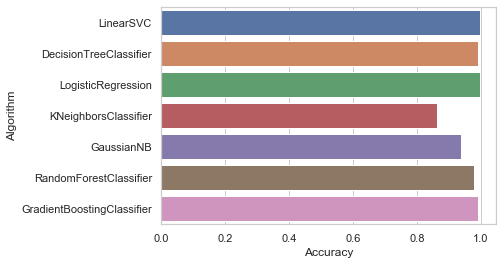

In [51]:
sns.barplot(x="Accuracy", y="Algorithm", data=dfmla)

In [52]:
#Getting feature inferneces from differnt models

1.knn

In [53]:
KNNaccu = []
Neighbours = []

for neighbour in range(1,16):
    model = KNeighborsClassifier(n_neighbors=neighbour)
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    KNNaccu.append(accuracy_score(pred , y_test))
    Neighbours.append(neighbour)

In [54]:
d = { "Neighbours" : Neighbours , "Accuracy" : KNNaccu }
knndf = pd.DataFrame(d)

C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


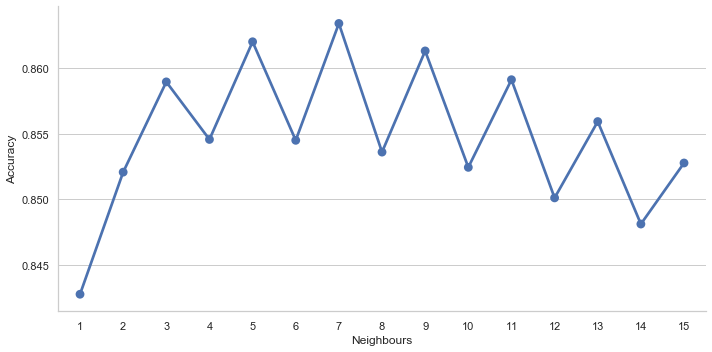

In [55]:
sns.factorplot(x="Neighbours", y="Accuracy",height = 5 ,aspect = 2 , data=knndf)
plt.show()

In [56]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)

y_pred_knn= knn.predict(X_test)

knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction Score",knn_score_test*100)

confusion_matrix(y_test, y_pred_knn)

Train Prediction Score 89.06691800188501
Test Prediction Score 86.34156077439957


array([[23391,   326],
       [ 3780,  2565]], dtype=int64)

2.DecisionTree,

In [57]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_imp_fe = dt.feature_importances_

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_imp_fe = rf.feature_importances_

In [59]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred_lg= lg.predict(X_test)

lg_score_train = lg.score(X_train,y_train)
print("Train Prediction Score",lg_score_train*100)
lg_score_test = accuracy_score(y_test,y_pred_lg)
print("Test Prediction Score",lg_score_test*100)

confusion_matrix(y_test, y_pred_lg)

Train Prediction Score 99.82591340023286
Test Prediction Score 99.79375956356863


C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[23716,     1],
       [   61,  6284]], dtype=int64)

In [74]:
expected = y_test
predicted = lg.predict(X_test)
from sklearn.metrics import classification_report
class_report = classification_report(expected,predicted,target_names=['Non-Risky-Borrower','Risky-Borrower'])
print(class_report)

                    precision    recall  f1-score   support

Non-Risky-Borrower       1.00      1.00      1.00     23717
    Risky-Borrower       1.00      0.99      1.00      6345

          accuracy                           1.00     30062
         macro avg       1.00      1.00      1.00     30062
      weighted avg       1.00      1.00      1.00     30062



In [60]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_imp_fe = gb.feature_importances_

In [61]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
ab_imp_fe = ab.feature_importances_

In [62]:
d = {'Feature_name':X_train.columns,'DecisonTree':dt_imp_fe,'RandomForest':rf_imp_fe,'gradientboost':gb_imp_fe,'adaboost':ab_imp_fe}

In [67]:
features = pd.DataFrame(data=d)
features['mean'] = features.mean(axis=1)
features = features.sort_values(by='mean',ascending=False)

In [71]:
features = features.reset_index(drop=True)

In [72]:
features

,Feature_name,DecisonTree,RandomForest,gradientboost,adaboost,mean
0,recoveries,5.725405e-01,0.297214,0.641421,0.02,0.382794
1,total_pymnt,8.879278e-02,0.100702,0.055014,0.40,0.161127
2,funded_amnt,9.524565e-02,0.050679,0.074591,0.26,0.120129
3,last_pymnt_amnt,5.297839e-02,0.204227,0.071759,0.06,0.097241
4,out_prncp,1.113755e-01,0.041122,0.108268,0.02,0.070191
5,total_rec_int,1.296010e-02,0.019618,0.003885,0.14,0.044116
6,term,3.991132e-02,0.029057,0.031307,0.02,0.030069
7,debt_settlement_flag_Y,7.089210e-03,0.028125,0.005558,0.02,0.015193
8,total_rec_late_fee,1.242267e-03,0.013663,0.002503,0.02,0.009352
9,all_util,2.180766e-03,0.003903,0.003107,0.02,0.007298
